
# Project: Investigate a Dataset - [noshowappointments.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

noshowappointment.csv data is a dataset collected in Brazil to determine whether patients show up for their appointment on their scheduled day. Various data about each patients(110052 patients) were collected and presented in each row. The information gotten from each participants were represented in 14 columns, patients id; shows their hospital registration number, appointment id; indicates their appointment number. Data on their gender was collected to differentiate the males from the females. The various date of their appointment and scheduled date were collected to keep record of the actual day the patients is supposed to show up. Information about the patients age were gotten and the name of the neighbourhood in which the hospital is located  to determine if actually affects them coming on their scheduled day or not. The scholarship column was to indicate whether the patients were enrolled in the Brasillian welfare programme. Information about the patient's health conditions were represented in four columns which includes: diabetes, hypertension, handicap and achoholism. SMS were also sent to some participants and was represented in a column to show whether they recieved it. the last column labelled 'No-show' represents whether the patients made it to their appointment on the scheduled day. 


### Question(s) for Analysis

1. How many patients showed up for their appointment on their scheduled day?

2. How many of the patients received SMS?

3. what are the factors that influence patients to show up on their scheduled day?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [11]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


firstly, I loaded the dataset and used df.info() to get information about each column and total number of entries

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


To check if there is any duplicate data in the dataset 

In [3]:
sum(df.duplicated())

0

viewing the first five rows in the dataset to get a broader view of the dataset

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


This is to know if each column are represented in the accurate data type needed to execute an analysis

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

I will change the ScheduledDay and AppointmentDay column to datetime data.
SMS_received column will be converted to an object

**DATA CLEANING**

In this section i will make my data fit for analysis by converting some data types to the right data type

Changing the ScheduledDay and AppointmentDay from string to datetime data type

In [6]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
print(df.dtypes)

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay            object
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object


In [7]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
print(df.dtypes)

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object


changing the SMS_receive column to object datatype

In [8]:
d = {0: True, 1: False}
df['SMS_received'].replace(d)
df['SMS_received'] = df['SMS_received'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null object
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(4)
memory usage: 11.8+ MB


To know the mean, minimum and maximum age group of patients in each appointment day. This is to get a better description of which age group were scheduled for appointment on a particular day.

In [9]:
result = df.groupby('AppointmentDay').agg({'Age': ['mean', 'min', 'max']})
print('mean, min and max values of age grouped by appointment day')
print(result)

mean, min and max values of age grouped by appointment day
                      Age         
                     mean min  max
AppointmentDay                    
2016-04-29      35.704482   0   98
2016-05-02      36.825640   0   95
2016-05-03      37.371006   0  102
2016-05-04      36.660509   0   95
2016-05-05      37.126141   0   96
2016-05-06      37.533643   0   98
2016-05-09      37.086726   0   97
2016-05-10      36.871634   0   97
2016-05-11      36.669200   0   96
2016-05-12      36.656122   0   98
2016-05-13      36.722598   0   97
2016-05-14      53.589744  18   87
2016-05-16      36.349881   0  115
2016-05-17      36.938472   0   97
2016-05-18      36.482049   0   96
2016-05-19      36.985480   0  115
2016-05-20      36.535789   0   96
2016-05-24      37.794712   0   96
2016-05-25      37.080327   0   94
2016-05-30      37.119849   0  115
2016-05-31      37.810937   0  100
2016-06-01      38.109991   0  100
2016-06-02      38.201160   0  102
2016-06-03      38.477995   0  

## EXPLORATORY DATA ANALYSIS
**RESEARCH QUESTION 1**(How many patients showed up for their appointment on their scheduled day?)

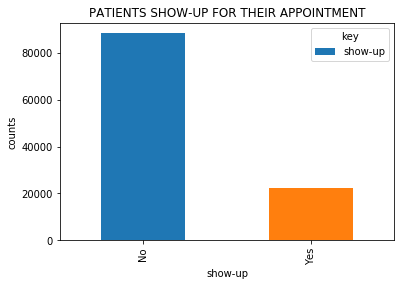

In [37]:
df['No-show'].value_counts().plot(kind = 'bar');
plt.title('PATIENTS SHOW-UP FOR THEIR APPOINTMENT')
plt.xlabel('show-up')
plt.ylabel('counts') 
plt.legend(['show-up', 'NO show-up'], loc = 'upper right', title = 'key')

In the bar chart, No signifies that they did show up, while Yes signifies they did not show up. Therrfore, above 80000 patients showed up for their appointment on the scheduled day and 20000 did not show up.

**RESEARCH QUESTION 2**(How many of the patients received SMS?)

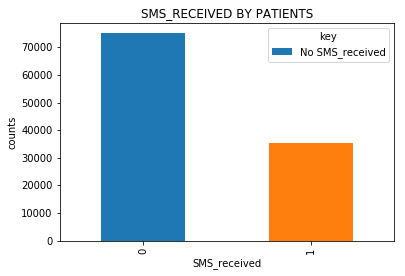

In [38]:
df['SMS_received'].value_counts().plot(kind = 'bar');
plt.title('SMS_RECEIVED BY PATIENTS')
plt.xlabel('SMS_received')
plt.ylabel('counts')
plt.legend(['No SMS_received', 'SMS_received'], loc = 'upper right', title = 'key')

The bar chat shows the number of patients who received SMS and those who did not. it shows that over 70000 patients did not recieve SMS and about 35000 patients received SMS.

**REASEARCH QUESTION 3**(what are the factors that influence patients to show up on their scheduled day?)

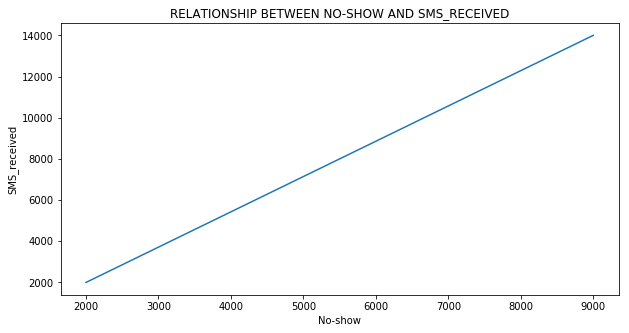

In [26]:
x = df['No-show'].value_counts() 
y = df['SMS_received'].value_counts()
def custom_plot(x, y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs)
    return(ax)
plt.figure(figsize=(10, 5))
custom_plot([2000, 9000], [2000, 14000])
plt.title('RELATIONSHIP BETWEEN NO-SHOW AND SMS_RECEIVED')
plt.xlabel('No-show')
plt.ylabel('SMS_received')
plt.show()

The chart above shows that as patients who received SMS increases, the  number who did not show up for their appointment increases.

In [41]:
print(df['No-show'].value_counts().corr(df['SMS_received'].value_counts()))

nan


In [52]:
print(df['No-show'].value_counts().corr(df['Age']))

nan


In [51]:
print(df['No-show'].value_counts().corr(df['ScheduledDay'].value_counts()))

nan


In [53]:
print(df['No-show'].value_counts().corr(df['Neighbourhood']))

nan


The above codes shows that there is no relationship between No-show and SMS_received, ScheduledDay, Age and Neighbourhood of patients.

<a id='conclusions'></a>
## Conclusions

This is a data analysis of the noshowappointment.csv datset, which displays the entries of various patients to determine if certain factors are related to their ability to show up for their appointment in the scheduled day. 
The analysis shows that about 70000 of the patients showed up for their appointment, while only below half did not show up on their scheduled day.
Majority of the patients did not recieve SMS as a reminder for their scheduled appointmentm, while just a few were sent an SMS.
Patients age, neighbourhood, scheduled day and whether or not they received an SMS have no correlation with them showing up for their appointment on their scheduled day.

## LIMITATION

The limitation to this exploratory analysis lies on the huge amount of data present which might have resulted to no correlation among variables.

## CONCLUSION

 The result of these analysis implies that patient's ability to show up on their scheduled day is not related to any factors and might be a personal reason. This analysis requires more information about the patients living condition and mindset towards health.



In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0